In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_file_path = '/content/drive/My Drive/dataset.zip'  # Change this to your file path
import zipfile
import os

# Destination folder where you want to extract the files
destination_folder = '/content/dataset/'

# Make sure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

print(f"Extracted files to {destination_folder}")


# List files in the extracted folder
extracted_files = os.listdir(destination_folder)
print(extracted_files)



Extracted files to /content/dataset/
['__MACOSX', 'dataset']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Step 1: Install dependencies and set up the environment
!pip install tensorflow==2.14.0 numpy
from tensorflow.keras import layers, models, optimizers, utils, datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 110.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
  Attempting uninstall: google-auth-oauthlib
    Found existing in

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np

from tensorflow.keras.preprocessing import image_dataset_from_directory

# Load training and validation data with resizing to 32x32
train_dataset = image_dataset_from_directory(
    '/content/dataset/dataset/train',
    batch_size=32,
    label_mode='int',
    image_size=(32, 32)  # Resize here
)

val_dataset = image_dataset_from_directory(
    '/content/dataset/dataset/test',
    batch_size=32,
    label_mode='int',
    image_size=(32, 32)  # Resize here
)

# Get the original image size dynamically
for images, _ in train_dataset.take(1):  # Take one batch
    original_image_size = images.shape[1:3]  # Extract (height, width)
    print(f"Original Image Size: {original_image_size}")

# Convert train dataset to numpy arrays
x_train = []
y_train = []

for images, labels in train_dataset:
    x_train.append(images.numpy())
    y_train.append(labels.numpy())

x_train = np.concatenate(x_train)
y_train = np.concatenate(y_train)

# Convert validation dataset to numpy arrays
x_test = []
y_test = []

for images, labels in val_dataset:
    x_test.append(images.numpy())
    y_test.append(labels.numpy())

x_test = np.concatenate(x_test)
y_test = np.concatenate(y_test)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


Found 1800 files belonging to 3 classes.
Found 450 files belonging to 3 classes.
Original Image Size: (32, 32)
x_train shape: (1800, 32, 32, 3)
y_train shape: (1800,)
x_test shape: (450, 32, 32, 3)
y_test shape: (450,)


In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(32, 32, 3)),  # Normalize input

    # First block
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', strides=2, padding='same'),  # Downsample via strides
    tf.keras.layers.Dropout(0.2),

    # Second block
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', strides=2, padding='same'),  # Downsample via strides
    tf.keras.layers.Dropout(0.3),

    # Third block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', strides=2, padding='same'),  # Downsample via strides
    tf.keras.layers.Dropout(0.3),

    # Flatten instead of pooling
    tf.keras.layers.Flatten(),

    # Fully connected layers
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3)  # 3 classes: rock, paper, scissors
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
model.evaluate(x_test, y_test)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 16)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_9 (Dropout)         (None, 8, 8, 32)         

[0.3497312664985657, 0.8622221946716309]

In [ ]:
model.evaluate(x_test, y_test)

15/15 [==============================] - 0s 16ms/step - loss: 0.3497 - accuracy: 0.8622


[0.3497312664985657, 0.8622221946716309]

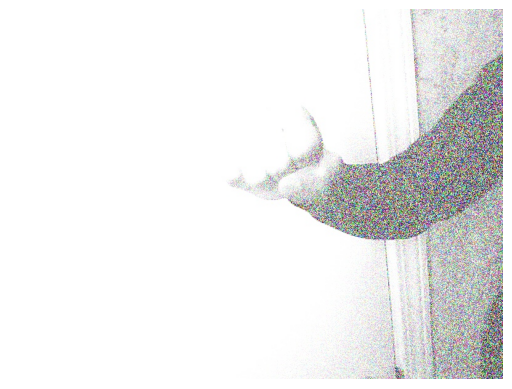

1/1 [==============================] - 0s 90ms/step
Predicted class: paper


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Path to the image you want to test
img_path = '/content/dataset/dataset/test/rock/augmented2_rock 100.jpg'  # Update this path

# Load the image (WITHOUT resizing)
img = image.load_img(img_path)  # No target_size argument

# Convert the image to a numpy array for display
img_array_display = np.array(img)  # Convert PIL Image to NumPy array

# Display the image correctly
plt.imshow(img_array_display)  # Use NumPy array directly
plt.axis('off')  # Hide axis labels
plt.show()

# Convert the image to a numpy array and rescale pixel values
img_array = image.img_to_array(img) / 255.0  # Scale pixel values to [0, 1]

# Add batch dimension (model expects (1, height, width, channels))
img_array = np.expand_dims(img_array, axis=0)

# Ensure the model expects the same image size
expected_input_shape = model.input_shape[1:3]  # Get model's expected input size

# Resize if necessary
if expected_input_shape != (None, None):  # If model expects a fixed size
    img = image.load_img(img_path, target_size=expected_input_shape)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

# Make a prediction
predictions = model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(predictions, axis=1)

# Map the predicted class back to the class name
class_names = ['rock', 'paper', 'scissors']  # Update based on your dataset
predicted_label = class_names[predicted_class[0]]

print(f"Predicted class: {predicted_label}")


In [ ]:
import tensorflow as tf
model.save("/content/my_model1.h5")
print("Model saved as my_model.h5")


Model saved as my_model.h5


In [ ]:
import tensorflow as tf
import numpy as np
import os

# Load the trained model
h5_model_path = "/content/my_model1.h5"
model = tf.keras.models.load_model(h5_model_path)
print("✅ Model loaded successfully!")

# Representative dataset function (needed for INT8 quantization)
def representative_dataset():
    for _ in range(100):  # Use a small subset of training images
        data = np.random.rand(1, 32, 32, 3).astype(np.float32)  # Change (32, 32, 3) based on your input shape
        yield [data]

# Convert the model to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Enable INT8 quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Enable optimizations
converter.representative_dataset = representative_dataset  # Use dataset for calibration
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]  # Ensure full INT8 quantization
converter.inference_input_type = tf.fp32  # Input must be int8
converter.inference_output_type = tf.fp32  # Output must be int8

# Convert the model
try:
    tflite_model = converter.convert()

    # Save the converted model
    tflite_model_path = "/content/model1_fp32.tflite"
    with open(tflite_model_path, "wb") as f:
        f.write(tflite_model)

    print("✅ Model successfully converted to INT8 TFLite!")
    print(f"TFLite model size: {os.path.getsize(tflite_model_path)} bytes")

except Exception as e:
    print("🚨 Error during TFLite conversion:", e)


✅ Model loaded successfully!


AttributeError: module 'tensorflow' has no attribute 'fp32'

In [ ]:
model.summary()
# print("TinyMaix model size:", os.path.getsize("/content/my_model.tmdl"), "bytes")

# Step 2: Define paths for the models
h5_model_path = "/content/my_model.h5"       # Path to your .h5 model
tflite_model_path = "/content/model1_fp32.tflite"  # Path to save the converted .tflite model
tmdl_model_path = "/content/my_model_best.tmdl"      # Path to save the converted .tmdl model

# Step 4: Clone the TinyMaix repository for .tmdl conversion
# !rm -rf /content/TinyMaix  # Remove existing directory if it exists
# !git clone https://github.com/sipeed/TinyMaix.git

# Step 5: Navigate to the tools directory
# %cd /content/TinyMaix/tools

# Step 6: Convert the .tflite model to .tmdl format
import os

# Define parameters for TinyMaix conversion
model_type = "fp32"                         # Model type (e.g., int8, fp32, etc.)
output_dequant = 1                          # Enable output dequantization (1 = enabled, 0 = disabled)
input_shape = "32,32,3"                   # Input shape of the model (height, width, channels)
output_classes = "3"                        # Number of output classes (e.g., 3 for classification)

# To this:

%cd /content/TinyMaix
!python -m tools.tflite2tmdl {tflite_model_path} {tmdl_model_path} {model_type} {output_dequant} {input_shape} {output_classes}
# Step 7: Verify if the .tmdl file was created successfully
if os.path.exists(tmdl_model_path):
    print(f".tflite model successfully converted to TinyMaix format (.tmdl) and saved at {tmdl_model_path}")
else:
    print("Error: The .tmdl file was not created. Please check for errors in the conversion process.")

print("TinyMaix model size:", os.path.getsize("/content/my_model_best.tmdl"), "bytes")


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 16)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_9 (Dropout)         (None, 8, 8, 32)         

In [ ]:
# Step 8: Download the .tmdl file (optional)
from google.colab import files
files.download(tmdl_model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf

# Load the trained model from H5 format
model = tf.keras.models.load_model("my_model1.h5")

# Convert the model to TFLite format (without quantization)
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# No quantization applied, keeping FP32 format
tflite_model = converter.convert()

# Save the TFLite model
tflite_filename = "model_fp32.tflite"
with open(tflite_filename, "wb") as f:
    f.write(tflite_model)

print(f"✅ Model successfully converted to FP32 TFLite format: {tflite_filename}")

OSError: No file or directory found at my_model1.h5

In [ ]:
import tensorflow as tf
import os

# Load the trained model
h5_model_path = "/content/my_model1.h5"
model = tf.keras.models.load_model(h5_model_path)
print("✅ Model loaded successfully!")

# Convert the model to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# FP32 Quantization (Default conversion)
# No need for optimizations or representative dataset
tflite_model = converter.convert()

# Save the converted model
tflite_model_path = "/content/model1_fp32.tflite"
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)

print("✅ Model successfully converted to FP32 TFLite!")
print(f"TFLite model size: {os.path.getsize(tflite_model_path)} bytes")

✅ Model loaded successfully!
✅ Model successfully converted to FP32 TFLite!
TFLite model size: 556596 bytes
